# 3. Datentransformation – Data Understanding und Data Preparation
## Anforderungen an Projektumsetzung: Datentransformation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

apps = pd.read_csv("Daten/Google-Playstore.csv")

---
**AUFGABE:**

Führen Sie zwei DataFrames mit `merge` zusammen - wenn Sie nur ein DataFrame haben, können Sie z.B. eine Konvertierungstabelle erstellen und anspielen (z.B. Land zu Kontinent)

In [ ]:
# Verwerende Daten aus Abschnitt 2.) Datenexploration
apps_in_kb = apps.copy()
apps_in_kb = apps[apps.Size.str.contains('k', na=False)].copy()
apps_in_kb["Size"]

apps_in_kb["Size"] = apps_in_kb["Size"].str.replace("k", "")
apps_in_kb["Size"] = apps_in_kb["Size"].str.replace(",", "")
apps_in_kb["Size"]= pd.to_numeric(apps_in_kb["Size"], errors='raise')
apps_in_kb["Size"] = apps_in_kb["Size"] / 1000.0
apps_in_kb["Size"]

apps_in_mb = apps.copy()
apps_in_mb = apps_in_mb[apps_in_mb.Size.str.contains('M', na=False)].copy()
apps_in_mb["Size"] = apps_in_mb["Size"].str.replace("M", "")
apps_in_mb["Size"] = apps_in_mb["Size"].str.replace(",", "")
apps_in_mb["Size"]= pd.to_numeric(apps_in_mb["Size"], errors='raise')

apps_varies = apps.copy()
apps_varies = apps_varies[apps_varies.Size.str.contains('Varies with device', na=False)].copy()
apps_varies["Size"] = apps_varies["Size"].str.replace("Varies with device", "0.0")
apps_varies["Size"]= pd.to_numeric(apps_varies["Size"], errors='raise')

apps_concated = pd.concat([apps_in_kb, apps_in_mb, apps_varies], ignore_index = False )
apps_concated.Size  # NaN Werte nicht enthalten
apps_concated = pd.concat([apps_in_kb, apps_in_mb, apps_varies], ignore_index = False )
apps_concated.Size  # NaN Werte nicht enthalten

size = apps_concated.Size

In [8]:
conv_in_mb = apps.merge(size, left_index = True, right_index = True)
conv_in_mb.head()

,Unnamed: 0,App Name,Category,Rating,Number of Rating,Installs,Minimum Installs,Maximum Installs,Free of Charge,App Price,...,Developer Id,Developer Website,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Size_y
0,0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,10.0
1,1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,Webserveis,https://webserveis.netlify.app/,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2.9
2,2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,Cabin Crew,NaN,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,3.7
3,3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,Climate Smart Tech2,http://www.climatesmarttech.com/,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,1.8
4,4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,Rafal Milek-Horodyski,http://www.horodyski.com.pl,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,6.2


In [10]:
# Überprüfung ob Merge funktioniert hat
conv_in_mb.loc[81, ['Size_x', 'Size_y']] 

Size_x     127k
Size_y    0.127
Name: 81, dtype: object

---
**AUFGABE:**

Erstellen Sie eine Pivot-Tabelle.

In [12]:
cat_groups = apps.groupby('Category')
cat_groups['Category'].count()

Category
Action                      27555
Adventure                   23203
Arcade                      53792
Art & Design                18539
Auto & Vehicles             18280
Beauty                      11772
Board                       10588
Books & Reference          116728
Business                   143771
Card                         8179
Casino                       5076
Casual                      50813
Comics                       2862
Communication               48167
Dating                       6524
Education                  241090
Educational                 21308
Entertainment              138276
Events                      12841
Finance                     65466
Food & Drink                73927
Health & Fitness            83510
House & Home                14369
Libraries & Demo             5198
Lifestyle                  118331
Maps & Navigation           26722
Medical                     32065
Music                        4202
Music & Audio              154906
News 

In [14]:
conv_in_mb['Rating_bins'] = pd.cut(conv_in_mb.Rating, [0.0, 0.99, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
conv_in_mb.head()

,Unnamed: 0,App Name,Category,Rating,Number of Rating,Installs,Minimum Installs,Maximum Installs,Free of Charge,App Price,...,Developer Website,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Size_y,Rating_bins
0,0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,10.0,"(-0.001, 0.99]"
1,1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2.9,"(4.0, 5.0]"
2,2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,3.7,"(-0.001, 0.99]"
3,3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,1.8,"(4.0, 5.0]"
4,4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,6.2,"(-0.001, 0.99]"


In [15]:
# Die Apps aus 0.0 werden nicht mitgezählt
pivot_apps_bins = conv_in_mb.pivot_table(index='Category', columns='Rating_bins', values='App Id', aggfunc='count',fill_value=0 )
pivot_apps_bins.head()

Rating_bins,"(-0.001, 0.99]","(0.99, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]"
Category,,,,,
Action,8714,110,1056,7990,8954
Adventure,7054,73,869,6001,8789
Arcade,22392,168,1306,8483,20358
Art & Design,9368,203,864,3016,4941
Auto & Vehicles,8493,266,1194,3471,4527


---
**AUFGABE:**

Überlegen Sie sich je mind. eine Analyse, die von den vorherigen Schritten ermöglicht werden. Erstellen Sie dazu Visualisierungen und fassen die Erkenntnisse zusammen.

C:\Users\fidel\AppData\Local\Temp/ipykernel_25060/2241331078.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot_apps_bins.index, rotation=90)


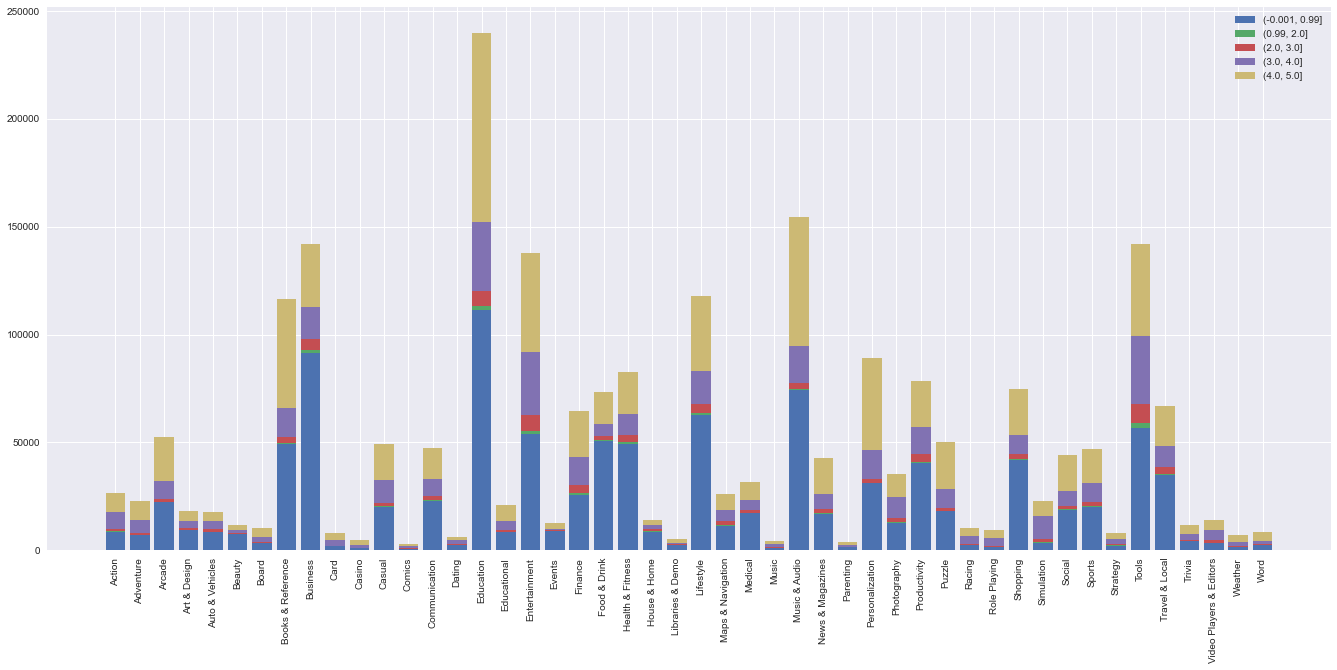

In [21]:
# Stacked-Bar-Chart innerhalb einer Kategorie
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(23,10))
pal = sns.color_palette("tab20")

bottom=pivot_apps_bins[pivot_apps_bins.columns[0]] - pivot_apps_bins[pivot_apps_bins.columns[0]]
for column in pivot_apps_bins.columns:
    ax.bar(pivot_apps_bins.index, pivot_apps_bins[column], bottom=bottom, label=f'{column}')
    bottom += pivot_apps_bins[column]

ax.set_xticklabels(pivot_apps_bins.index, rotation=90)
plt.legend()
plt.show()

### Annahme für den Stacked-Bar-Chart
**Wir sind App-Entwickler und unsere App befindet sich seit einem Monat auf dem Markt.**

**Eigenschaften der App:**
 - **Kategorie:**      Finance
 - **Free of Charge:** True
 - **Rating:**         4.1
 

Mit diesem Stacked-Bar-Chart wollen wir analysieren, ob sich unsere Finance App innerhalb der selben Kategorie über- oder unterdurchschnittlich bewertet wurde. Mit einer unterdurchschnittlichen Bewertung sollte die Strategie überdacht und mit Konkurrenzprodukten verglichen werden. Bei überdurchschnittlicher Bewertung sind vorerst keine Updates oder weiteren Features notwendig. 

In [22]:
pivot_apps_conv = conv_in_mb.pivot_table(index='Rating', columns='Category', values='App Id', aggfunc='count',fill_value=0 )
pivot_apps_conv.head()

Category,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,Card,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Rating,,,,,,,,,,,,,,,,,,,,,
0.0,8714,7054,22392,9368,8493,7566,3301,49454,91652,1884,...,3594,18801,20259,2271,56922,34923,4485,3332,1703,2666
1.0,1,2,9,18,11,3,1,22,39,1,...,15,10,18,5,89,28,0,4,0,2
1.1,1,1,2,1,1,1,0,5,15,0,...,13,8,2,0,22,8,0,1,2,0
1.2,5,1,6,5,5,5,1,11,31,2,...,10,9,7,3,60,20,2,5,1,1
1.3,2,2,5,6,3,2,3,9,36,0,...,9,14,17,1,56,24,4,4,5,0


Schwellenwert: 4063.875



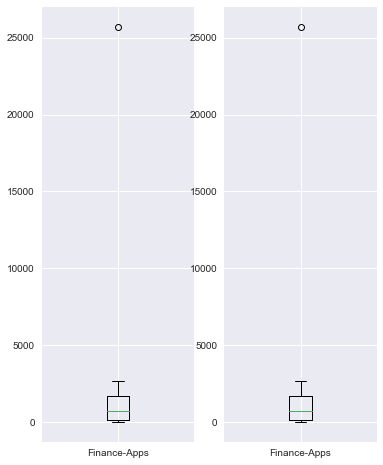

In [33]:
finance_total = pivot_apps_conv['Finance'].sum()

Q1 = pivot_apps_conv['Finance'].quantile(0.25)
Q2 = pivot_apps_conv['Finance'].quantile(0.75)
upper_threshold = Q2 + 1.5 * (Q2 - Q1)
print("Schwellenwert: " + str(upper_threshold) + '\n')

pivot_apps_conv4070000 = pivot_apps_conv[pivot_apps_conv['Finance'] <= 4070000]
fig, ax = plt.subplots(ncols=2, figsize=(6,8))
ax[0].boxplot(pivot_apps_conv['Finance'], labels=['Finance-Apps'])
ax[1].boxplot(pivot_apps_conv4070000['Finance'], labels=['Finance-Apps'])
plt.show()